# Avocado Project

Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year
•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip



In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 18249
No. of Columns : 14


In [4]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'year'], float64: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], object: ['Date', 'type', 'region']}

#### Observations: ####
- **There are int,FLoat and object data types available in the dataset**

In [5]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

float64    9
object     3
int64      2
dtype: int64

#### Observations: ####
- **No. of object datatypes: 3**
- **No. of float datatypes: 9**
- **No. of int datatypes: 2**

# Data Integrity Check

### Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

In [6]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

#### Observations:
- **No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe**

### Duplicate Values Check

In [7]:
df.duplicated().sum()

0

In [8]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


#### Observations: 
- **No duplicate values present in the dataframe**


### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [9]:
df_categorical=['Date', 'type', 'region']

for i in df_categorical:
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    print('\033[1m'+i,'"Values Count"'+'\033[0m')
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts())[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*100)

Date "Values Count"


,Value,Count,% Count
0,2015-12-27,108,0.6
1,2017-12-24,108,0.6
2,2017-12-10,108,0.6
3,2017-12-03,108,0.6
4,2017-11-26,108,0.6
...,...,...,...
164,2016-11-06,108,0.6
165,2018-01-07,108,0.6
166,2017-06-18,107,0.6
167,2017-06-25,107,0.6


type "Values Count"


,Value,Count,% Count
0,conventional,9126,50.0
1,organic,9123,50.0


region "Values Count"


,Value,Count,% Count
0,Albany,338,1.9
1,Sacramento,338,1.9
2,Northeast,338,1.9
3,NorthernNewEngland,338,1.9
4,Orlando,338,1.9
5,Philadelphia,338,1.9
6,PhoenixTucson,338,1.9
7,Pittsburgh,338,1.9
8,Plains,338,1.9
9,Portland,338,1.9


#### Observations:
- **Columns "Date", "type","Regions" Seems to have equivally distributed values**


In [10]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Null Values Handling

In [11]:
df.isnull().sum().sum() # Checking the sum of null values for all columns

0

In [12]:
#Finding the percentage of data missing from the dataset
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
df_null=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null.sort_values(by=["% Missing data"],ascending=False)

Missing Values


,Data Type,Missing Values,% Missing data
Unnamed: 0,int64,0,0.0
Date,object,0,0.0
AveragePrice,float64,0,0.0
Total Volume,float64,0,0.0
4046,float64,0,0.0
4225,float64,0,0.0
4770,float64,0,0.0
Total Bags,float64,0,0.0
Small Bags,float64,0,0.0
Large Bags,float64,0,0.0


#### Observation:
- **No Missing Values are available

# Segregating columns based on data type for better EDA

In [13]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'year'], float64: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], object: ['Date', 'type', 'region']}

In [14]:
# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype=='int64']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
df_numerical=df[numerical]

There are 2 numerical variables

The numerical variables are : ['Unnamed: 0', 'year']


In [15]:
# renaming column names into meaningful names
df = df.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})

In [16]:

# Dropping unneccessary column 'Unnamaed' as it will not contribute to model learning
df = df.drop(['Unnamed: 0'],axis = 1)
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
# Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='object']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df_categorical=df[categorical]

There are 3 categorical variables

The categorical variables are : ['Date', 'type', 'region']


# Statistical Summary:

In [18]:
df_categorical.describe(include='O')

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


#### Observations:
- **count is same for all the columns.so,no null values are present**
- **unique shows the uniqueness present in each column**
- **Top indicates the mode of each column like 2015-12-27 is mode for Date column, conventional is mode for type,Albany is mode for region column .**

In [19]:
df.describe()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


All columns having count 18249. Looks like it doesn't contain missing values

# Visualization of data

### Univariate Graphical Analysis 

In [20]:
#Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [21]:
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [22]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['Date'], int64: ['year', 'Month', 'Day'], float64: ['AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], object: ['type', 'region']}

In [23]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

float64           9
int64             3
object            2
datetime64[ns]    1
dtype: int64

array([[<AxesSubplot: title={'center': 'Date'}>,
        <AxesSubplot: title={'center': 'AveragePrice'}>,
        <AxesSubplot: title={'center': 'Total Volume'}>,
        <AxesSubplot: title={'center': 'PLU_4046'}>],
       [<AxesSubplot: title={'center': 'PLU_4225'}>,
        <AxesSubplot: title={'center': 'PLU_4770'}>,
        <AxesSubplot: title={'center': 'Total Bags'}>,
        <AxesSubplot: title={'center': 'Small Bags'}>],
       [<AxesSubplot: title={'center': 'Large Bags'}>,
        <AxesSubplot: title={'center': 'XLarge Bags'}>,
        <AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'Month'}>],
       [<AxesSubplot: title={'center': 'Day'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

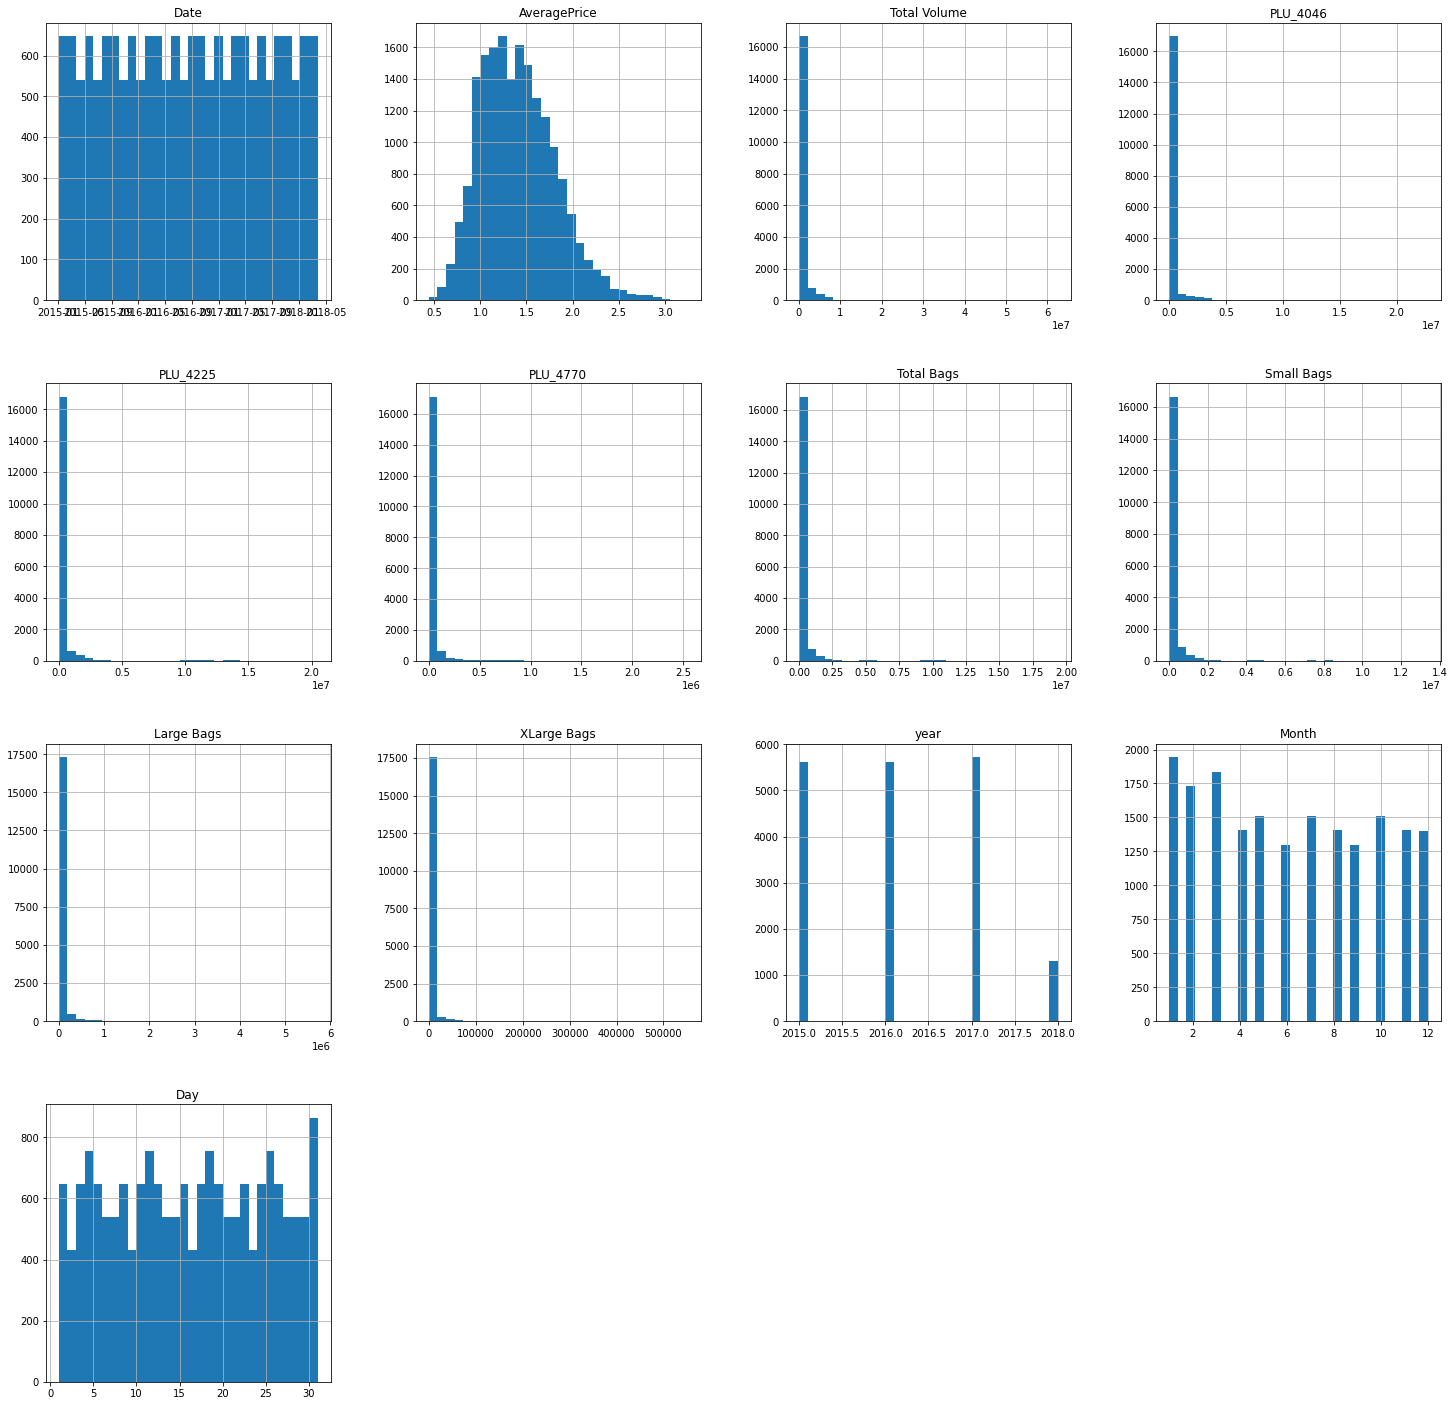

In [24]:
df.hist(figsize=(25,25),grid=True,layout=(4,4) ,bins=30)

<AxesSubplot: xlabel='AveragePrice', ylabel='type'>

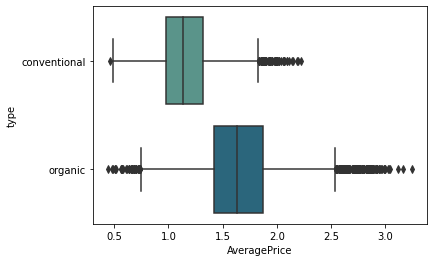

In [25]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'crest')

we can say that Organic fruit price is more as compared to conventional fruit.

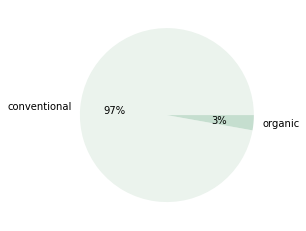

In [26]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

# trace=ax.Pie(labels=labels,values=values)
# py.iplot([trace])
palette_color = sns.light_palette("seagreen")
# plotting data on chart
plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

### ~ 3% of our dataset is organic. 

So looks like Conventional is in more demand.

<AxesSubplot: xlabel='AveragePrice'>

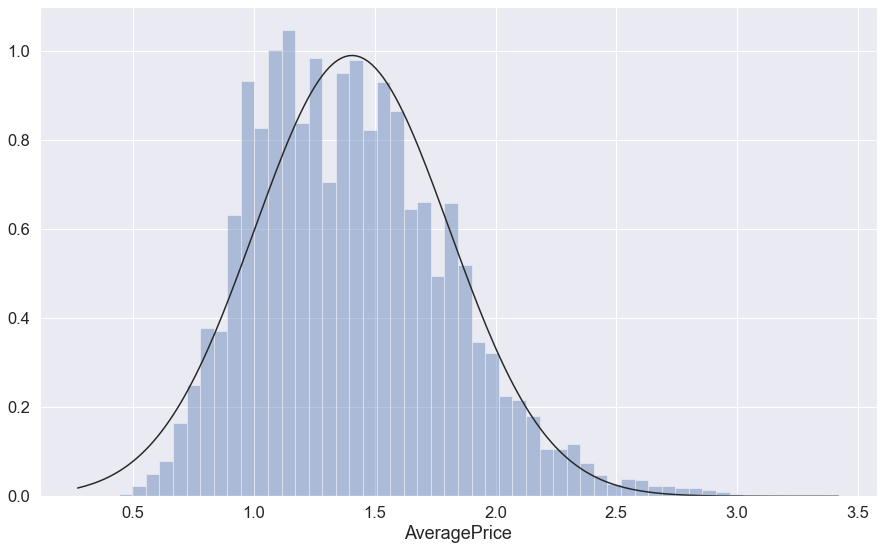

In [27]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.

### Bivariate Graphical Analysis

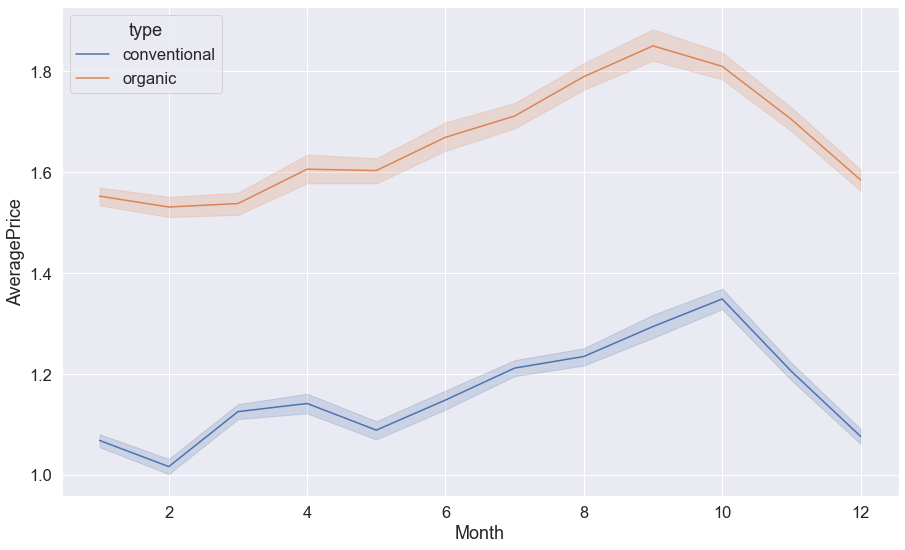

In [28]:
plt.figure(figsize=(15,9))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

#### Observations:
- **there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices**


Text(0.5, 1.0, 'Average Price of Avocado as per Region')

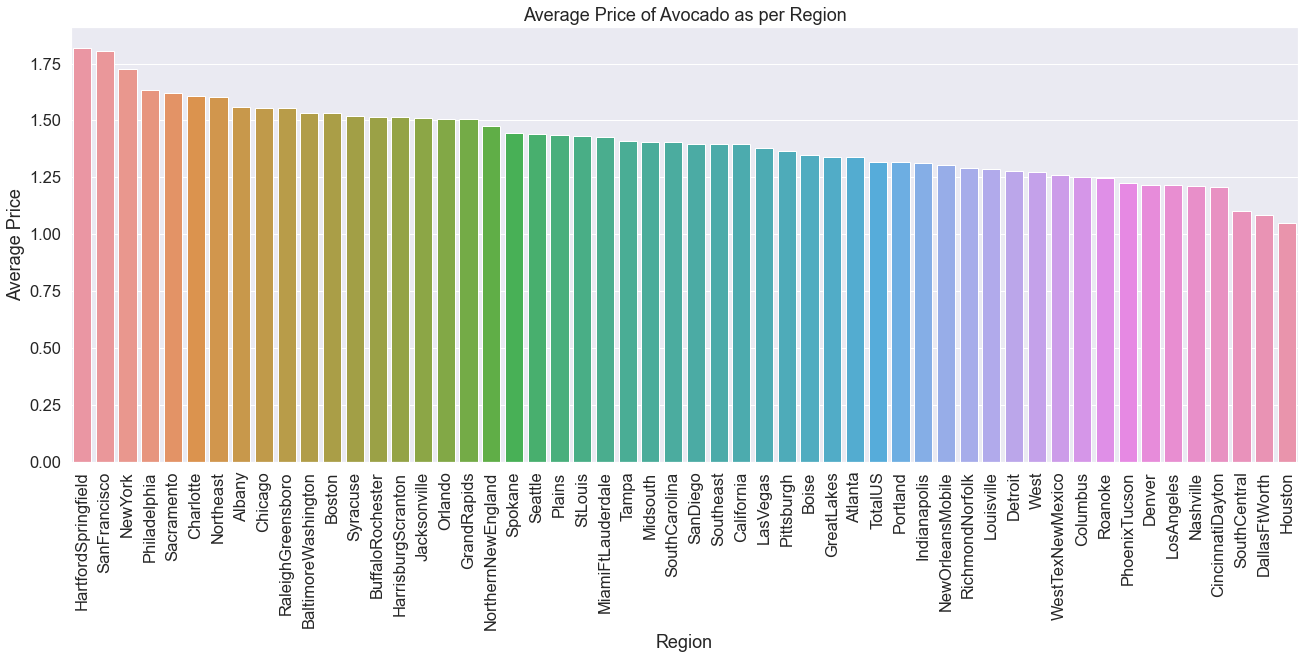

In [29]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(22,8))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado as per Region')

#### Observations:
- **Below regions have very high price **

    HartfordSpringfield
    
    SanFrancisco
    
    NewYork
    
    Philadelphia
    
    Sacramento


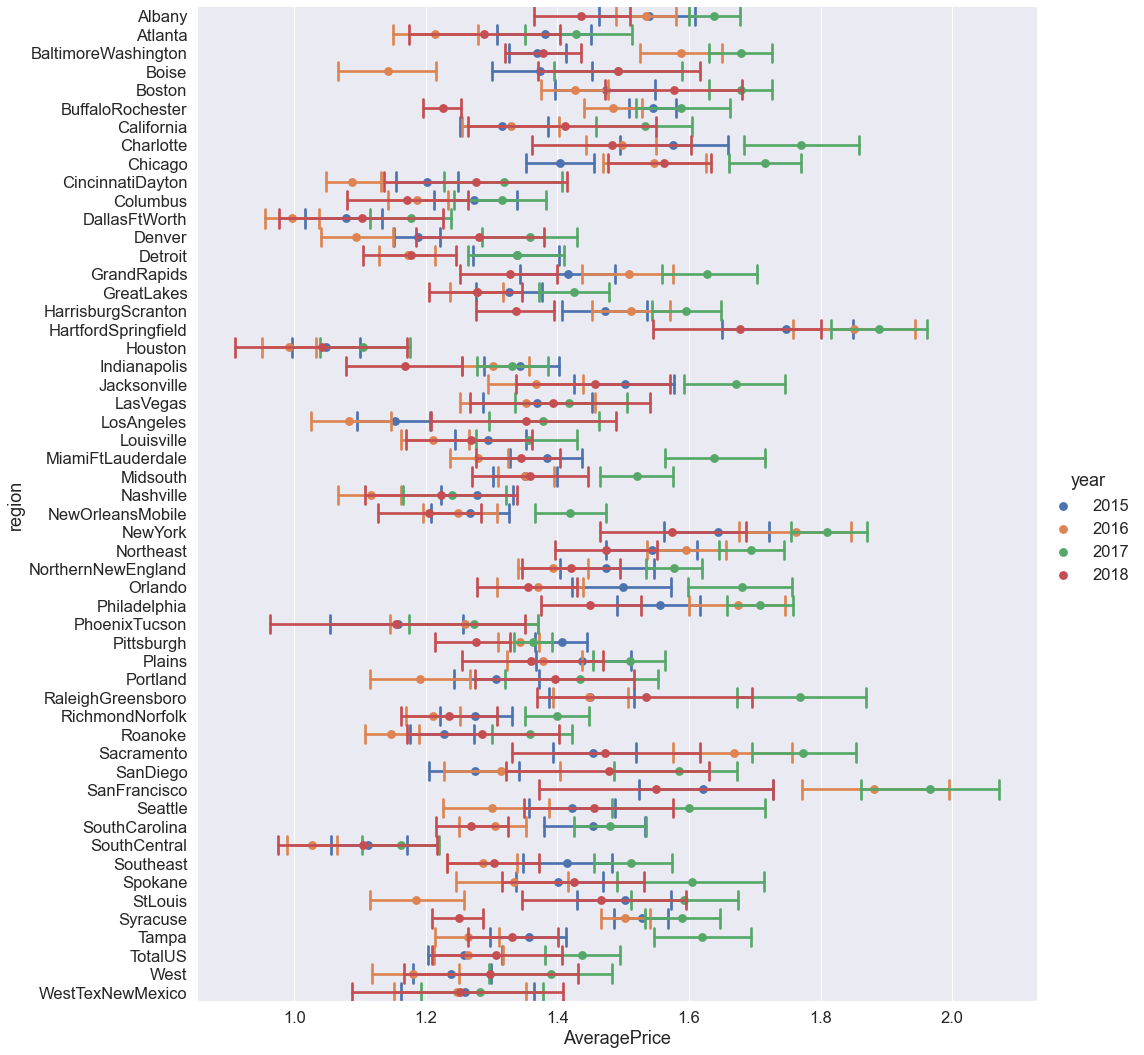

In [30]:
sns.catplot( x="AveragePrice", y="region",data=df, hue="year", kind='point', height=15, capsize=1, join=False)                   

#### Observations:
- **Looks like there was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region. .**

Text(0.5, 1.0, 'Average Price')

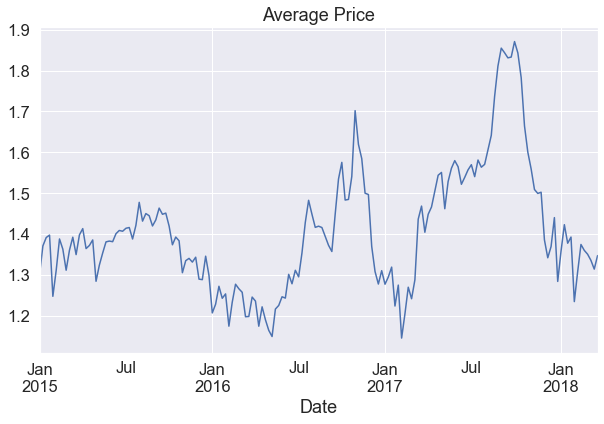

In [31]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(10,6))
byDate['AveragePrice'].plot()
plt.title('Average Price')

#### Observations:
- **This also shows there was a huge hike in prices after July 2017 and before Jan 2018. This was also confirmed in earlier graph too.
now lets have an idea about the relationship between our Features(Correlation)**


<AxesSubplot: >

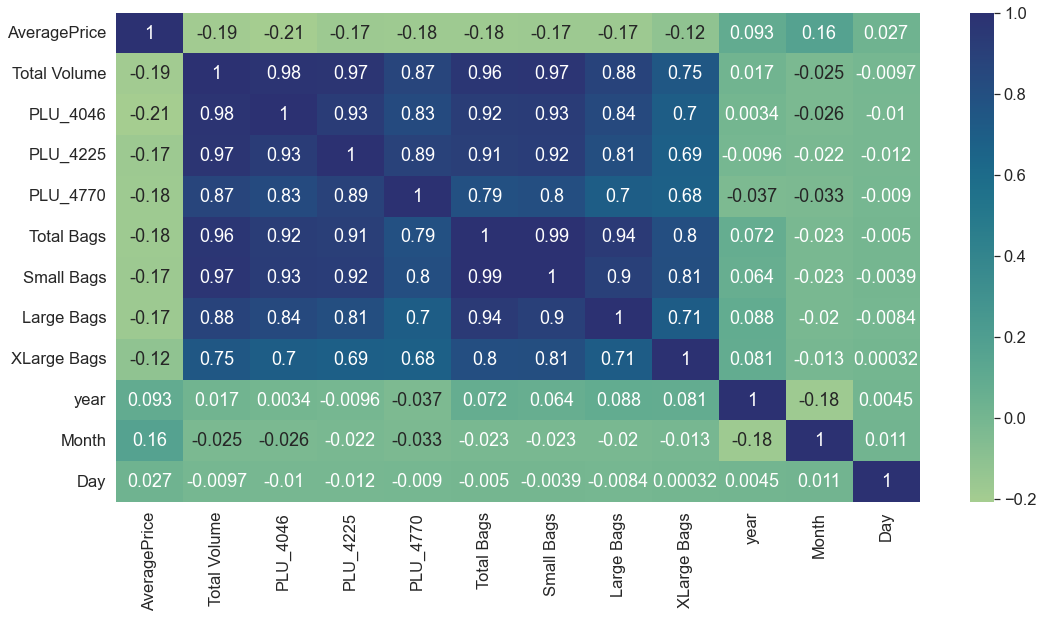

In [32]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),cmap='crest',annot=True)

From the heatmap--> all the Features are not correleted with the Average Price column, instead most of them are correlated with each other. 

Let us try do some Feature Engineering on the categorical Features : region and type

In [33]:
df['region'].nunique()


54

In [34]:
df['type'].nunique()

2

As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [35]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [36]:
df_final.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


# Checking top features using SelectKBest algorithm

In [37]:
#sklearn.feature_selection.f_classif
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


x=df_final.drop("AveragePrice",axis=1)  # #independent columns
y=df_final["AveragePrice"]  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs      Score
11  type_organic  53.269112
1       PLU_4046   5.015080
0   Total Volume   4.122370
3       PLU_4770   4.078789
2       PLU_4225   3.508901
4     Total Bags   3.373669
5     Small Bags   3.331022
6     Large Bags   3.269397
8           year   3.056698
9          Month   3.051554


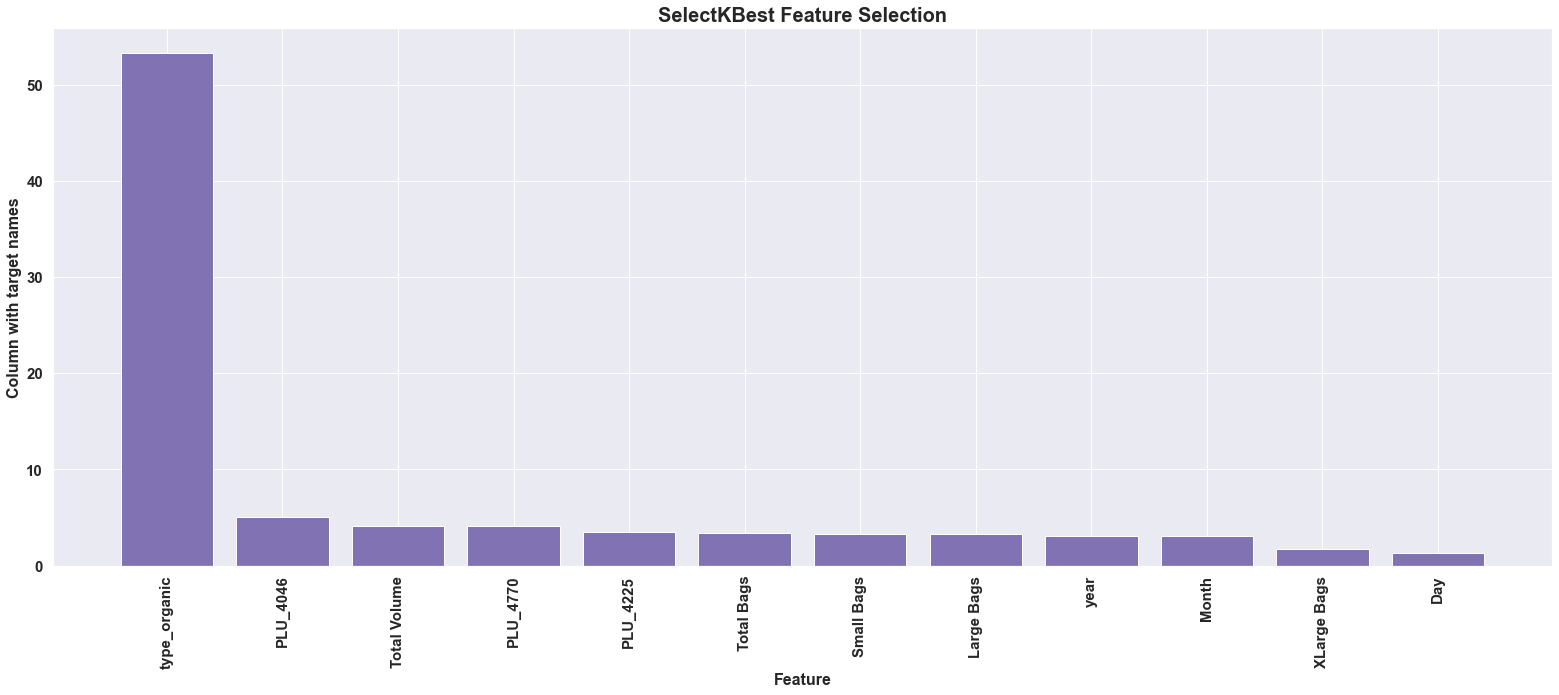

In [38]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Column with target names",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **With SelectKBest feature scores, Above columns Or features can be considered for model prediction**

In [39]:
x=df_final.drop("AveragePrice",axis=1)  # #independent columns
display(x)
y=df_final["AveragePrice"]  # Output variable
display(y)

,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

# Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [40]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x[list(x.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
4,2.502000e+14,Total Bags
5,1.429714e+14,Small Bags
6,1.521486e+13,Large Bags
7,7.856737e+10,XLarge Bags
0,5.212267e+09,Total Volume
1,6.946780e+08,PLU_4046
2,6.332778e+08,PLU_4225
3,4.973219e+06,PLU_4770
8,8.487000e+00,year
10,4.188855e+00,Day


#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **As there are no features with VIF values > 10 i.e. there is no multicollinearity between features hence not dropping any columns based on VIF score**
- **I will use this data for further processing of model building**

# check the outliers of each column:

Total Volume        AxesSubplot(0.125,0.71587;0.133621x0.16413)
PLU_4046         AxesSubplot(0.285345,0.71587;0.133621x0.16413)
PLU_4225          AxesSubplot(0.44569,0.71587;0.133621x0.16413)
PLU_4770         AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Total Bags       AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Small Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
XLarge Bags      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
year            AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Month           AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Day                AxesSubplot(0.125,0.321957;0.133621x0.16413)
type_organic    AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

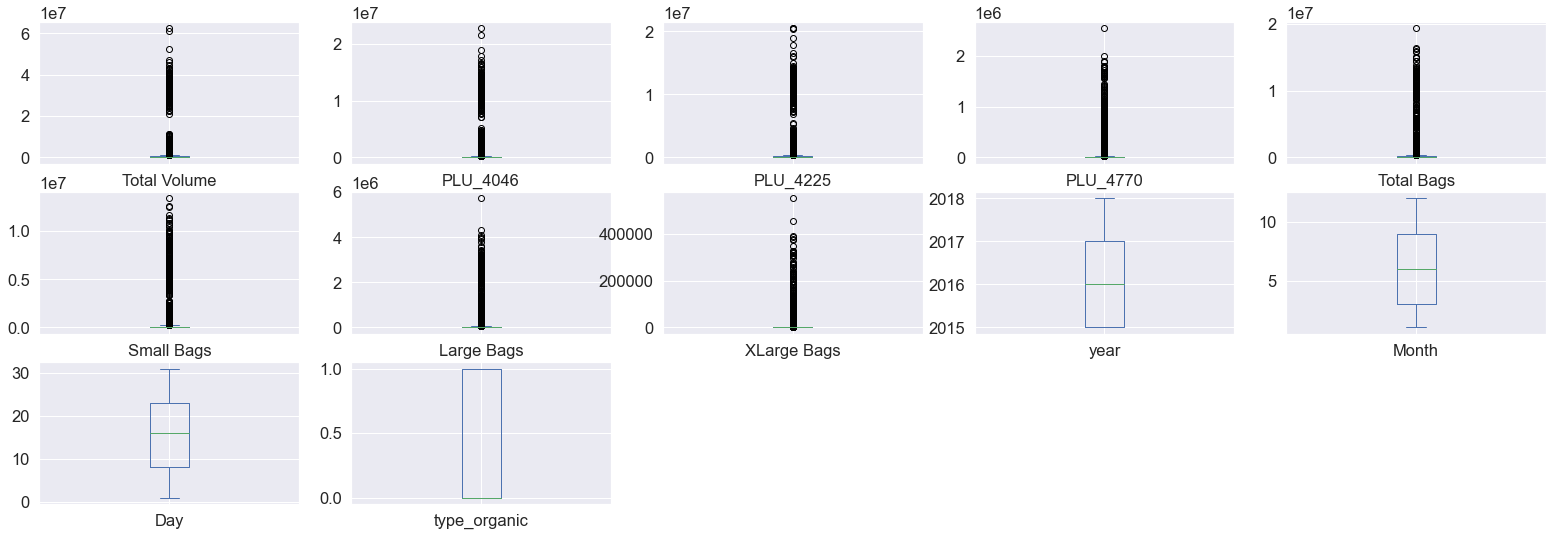

In [41]:
x.plot(kind='box',subplots= True,layout = (4,5),figsize=(27,12))

Outliers exist( for Avg price, Total Value, PLU_406,4225,4770,Total bags, Small Bags,Large,XLarge bags)

Which means most of the data are outside the distribution.

# Removing Outliers using z-score method

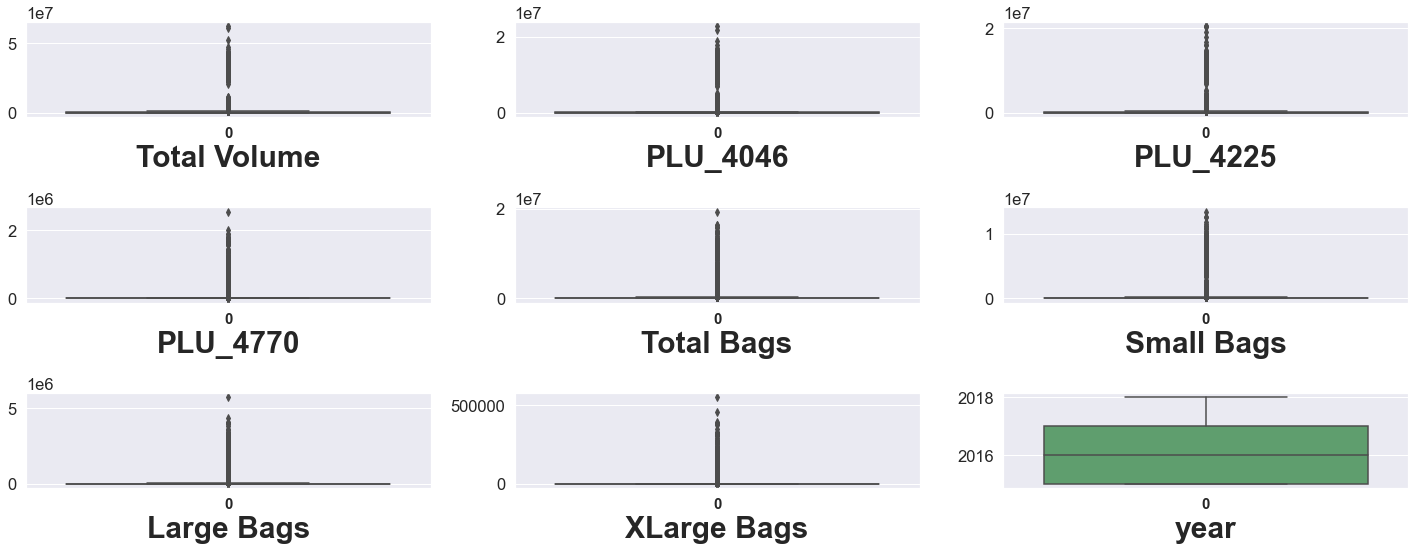

In [42]:
# We don't remove outliers of categorical X columns and in target variable, hence checking outliers for numerical X features
plt.figure(figsize=(20,8),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x[column],color='g')
        plt.xlabel(column,fontsize=30,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in all the columns**

# Removing Outliers using z-score method

In [43]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_final))
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [44]:
# Remove the rows in both x and y where the outliers are present in x features with continuous data
df_final_new=df_final[(z<3).all(axis=1)]
print("Check if Outliers exist \n",(np.abs(zscore(x))<3).all().all())
print("\n")
features_new = x[(z<3).all(axis=1)]
target_new = y[(z<3).all(axis=1)]
features2 = features_new
target2 = target_new

features2.shape ,target2.shape

Check if Outliers exist 
 False




((17651, 12), (17651,))

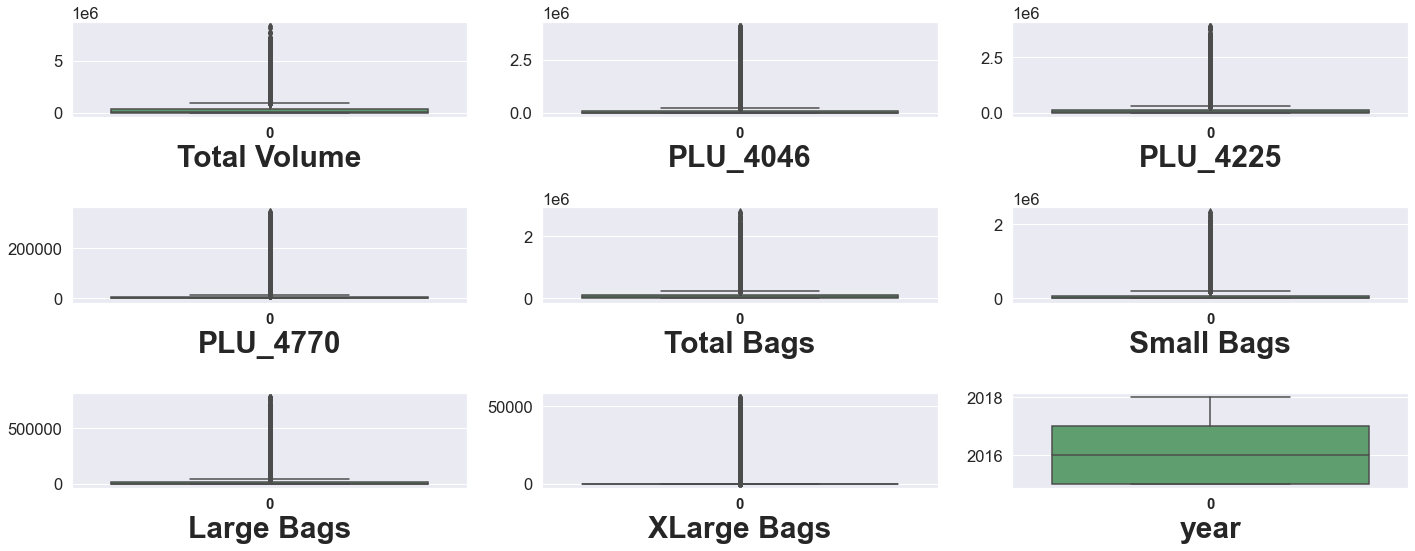

In [45]:
# Plotting features to check for outliers removal
plt.figure(figsize=(20,8),facecolor='white')
plotnumber=1

for column in features2:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(features2[column],color='g')
        plt.xlabel(column,fontsize=30,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features**

In [46]:
# Data loss calculation with z-score method
loss_percent_zscore=round((x.shape[0]-features2.shape[0])/x.shape[0]*100,5)
loss_percent_zscore

3.27689

#### Observations:
- **Data loss with z-score method is 3.27%. 

In [47]:
df_final_new

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [48]:
features=df_final_new.drop("AveragePrice",axis=1)  # #independent columns
display(features)
target=df_final_new["AveragePrice"]  # Output variable
display(target)

,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [49]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(features)
x=pd.DataFrame(data=x_scaled,columns=features.columns)
x.head(5)

,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.210013,1.644612,1.289309,-1.019047
1,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.210013,1.644612,0.491652,-1.019047
2,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.210013,1.644612,-0.306004,-1.019047
3,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.210013,1.644612,-1.103660,-1.019047
4,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.210013,1.362113,1.517211,-1.019047


In [50]:
print("Columns \n",x.columns)
features=x
display(features)
print("\n")
display(target)

Columns 
 Index(['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day',
       'type_organic'],
      dtype='object')


,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.210013,1.644612,1.289309,-1.019047
1,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.210013,1.644612,0.491652,-1.019047
2,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.210013,1.644612,-0.306004,-1.019047
3,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.210013,1.644612,-1.103660,-1.019047
4,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.210013,1.362113,1.517211,-1.019047
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.438579,-0.347153,-0.411112,-0.323616,-0.412326,-0.381520,-0.375195,-0.259027,1.980756,-1.180379,-1.331562,0.981309
17647,-0.441726,-0.349099,-0.406345,-0.323616,-0.427335,-0.399501,-0.376661,-0.259027,1.980756,-1.462878,1.403260,0.981309
17648,-0.441846,-0.349098,-0.408798,-0.302508,-0.426876,-0.397707,-0.380529,-0.259027,1.980756,-1.462878,0.605603,0.981309
17649,-0.439438,-0.348335,-0.407474,-0.302535,-0.421292,-0.390876,-0.380424,-0.259027,1.980756,-1.462878,-0.192053,0.981309


0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

# Model ----Prediction with Average Price:

In [51]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # Defining instance for linearregression

# Finding the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Finding the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


,Random State,Training R2 Score,Testing R2 Score,Difference in R2 Score
28,952,44.270893,44.268655,0.002238
8,293,44.269994,44.267048,0.002945
10,303,44.263840,44.259454,0.004386
0,35,44.265408,44.259219,0.006189
29,957,44.266186,44.259169,0.007017
7,244,44.268955,44.261468,0.007488
4,173,44.260083,44.268726,0.008642
3,172,44.267049,44.281026,0.013978
2,71,44.272371,44.253913,0.018458
13,353,44.268723,44.250020,0.018703


Observations:

As multple random states give same training and testing accuarcy scores selected random state: 952
    

In [52]:
# Getting the best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BRS=np.array(RSN)[0]
BRS

952

In [53]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=BRS)

In [54]:
# Training the model and checking  metrics with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.44268655332756923
Mean Absolute Error(MAE) :  0.2247091031385846
Mean Squared Error(MSE) :  0.0828864049818655
Root Mean Squared Error(RMSE) :  0.28789999128493476


# Cross Validation(CV) for Linear Regression

In [55]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation R2 Score,Model R2 Score,Difference in R2 Score
7,9,3.403901,44.268655,0.408648
5,7,2.564146,44.268655,0.417045
8,10,0.260513,44.268655,0.440081
6,8,-0.446590,44.268655,0.447152
4,6,-54.141154,44.268655,0.984098
3,5,-3004.921713,44.268655,30.491904
2,4,-3171.931903,44.268655,32.162006
1,3,-3600.294503,44.268655,36.445632
0,2,-42782.480409,44.268655,428.267491


Observations: 

Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=9 from the above table

In [56]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
BCV

9

In [57]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,features,target,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: 3.4039007156854226 
The model r2 score is: 44.26865533275692
Difference is: 0.408647546170715


# Few more Classification Algorithms

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# Defining the list with all Algorithms
models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]



# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # Appending "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         # Appending "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          # Appending "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))# Appending "RMSE" to the list 
    
    score=cross_val_score(model[1],features,target,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("Table with performance of the models")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["Difference in R2 Score"],ascending=True)  # sorting the score table using the difference

Table with performance of the models


,Model,Model R2 Score,Cross Validation R2 Score,Difference in R2 Score,MAE,MSE,RMSE
4,SVR(),62.214304,29.879077,0.323352,0.173349,0.056197,0.237059
10,GradientBoostingRegressor(),71.882427,38.865868,0.330166,0.155866,0.041818,0.204494
12,XGBRegressor(),85.620145,46.586306,0.390338,0.106765,0.021386,0.146241
2,KNeighborsRegressor(),64.776170,25.095327,0.396808,0.166715,0.052387,0.228881
3,SGDRegressor(),44.123480,4.153742,0.399697,0.225504,0.083102,0.288275
6,Ridge(),44.269045,3.440720,0.408283,0.224712,0.082886,0.287899
0,LinearRegression(),44.268655,3.403901,0.408648,0.224709,0.082886,0.287900
9,ExtraTreesRegressor(),89.456978,42.731624,0.467254,0.087147,0.015680,0.125220
11,AdaBoostRegressor(),55.637217,8.328429,0.473088,0.209300,0.065979,0.256863
8,RandomForestRegressor(),87.412080,35.853394,0.515587,0.097168,0.018721,0.136826


Observations:

Best model(**ExtraTreesRegressor()**) for this dataset because of:

**1.highest R^2 score**

**2.lowest root mean squared error**

Out of all algorithms checked,**ExtraTreesRegressor()**  model is selected for hyper parameter tuning

as the difference between model and cross-validation score is also less apart from SVR but due to high model score& CV score , ExtraTreesRegressor() is chosen

# Hyper Parameter Tuning

In [59]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
# Defining parameters for   ExtraTreesRegressor
parameters = {
           'n_estimators': [1,5],
            'criterion': ['mse', 'mae'],
            'max_depth': [2,4],
            'oob_score': [True, False],
            'max_features': ['sqrt','log2'],    
            'bootstrap': [True, False],
                
            }

GCV=GridSearchCV(ExtraTreesRegressor(),parameters,cv=BCV)  
GCV.fit(x_train,y_train)   #  GridSearchCV to train model with all combination of parameters
GCV.best_params_ 

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 5,
 'oob_score': False}

In [60]:
ExReg=ExtraTreesRegressor(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                        max_depth=GCV.best_params_['max_depth'],
                        oob_score=GCV.best_params_['oob_score'],max_features=GCV.best_params_['max_features'],
                        bootstrap=GCV.best_params_['bootstrap'])
ExReg.fit(x_train,y_train)
ExReg.score(x_train,y_train)
pred_decision=ExReg.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(ExReg,features,target,cv=2)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)
print("Difference is:",r2_score(y_test,pred_decision)-rfc)


R2 Score: 36.77214470440791
Cross Val Score: -128.71957822174792
Difference is: 1.6549172292615584


Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 1.29

Model with default parameters: The difference between Cross Validation Score and model score is 0.470

As difference is less in the model with default parameters We will consider the **ExtraTreesRegressor** model with default parameters

In [61]:
#models selected ===ExtraTreesRegressor()
print(models[8][1])
x_predict = list(models[8][1].predict(x_test))
#creating new dataframe
pd.DataFrame(x_predict).head(10)

ExtraTreesRegressor()


,0
0,1.0070
1,1.1875
2,1.1088
3,1.7296
4,1.3681
5,2.2107
6,1.0575
7,1.1224
8,0.9657
9,1.0775


In [62]:
avocado_newtest = [[-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.210013,1.644612,1.289309,-1.019047]]

#Predict Avg Proce for new Test Data
#model ===ExtraTreesRegressor()
avocado_avgPrice_predict =models[8][1].predict(avocado_newtest)
print(avocado_avgPrice_predict)

[1.33]


# Save Model-Prediction with Price

In [63]:
#ExtraTreesRegressor()
print("Model Saved--", models[8][1])
import pickle
file = 'avocado_avgprice-model'
save = pickle.dump(models[8][1],open('avocado_avgprice-model.pkl','wb'))

Model Saved-- ExtraTreesRegressor()


# Conclusion-Prediction with Price

In [64]:
pickled_avocado_avgprice_predict = pickle.load(open('avocado_avgprice-model.pkl','rb'))
result=pickled_avocado_avgprice_predict.score(x_test,y_test)
print(result)

AvgPrice_Predicted=pickled_avocado_avgprice_predict.predict(x_test)
df_predicted = pd.DataFrame(AvgPrice_Predicted, columns =['AvgPrice_Predicted'])
df_predicted['Original_AvgPrice'] = y_test
print("\nAverage Price Predicted list based on Test data provided: ")
display(df_predicted)

0.8945697764036791

Average Price Predicted list based on Test data provided: 


,AvgPrice_Predicted,Original_AvgPrice
0,1.0070,NaN
1,1.1875,1.35
2,1.1088,NaN
3,1.7296,NaN
4,1.3681,NaN
...,...,...
3526,1.2001,NaN
3527,1.0713,1.13
3528,1.8026,NaN
3529,1.2011,NaN


# Model ----Prediction with Region:

# Encoding categorical data

In [65]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [66]:
# target variable ==Region  will use binary classification model and starts with LogisticRegression

print("Columns \n",df.columns)
features_reg=df.drop(['region','Date'],axis=1)

display(features_reg)
print("\n")
target_reg=df["region"]
display(target_reg)



Columns 
 Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region', 'Month', 'Day'],
      dtype='object')


,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14


0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [67]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(features_reg)
x=pd.DataFrame(data=x_scaled,columns=features_reg.columns)
x.head(5)


,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,1.647632,1.291857
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,1.647632,0.494231
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,1.647632,-0.303396
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,1.647632,-1.101022
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,1.364669,1.519750


In [68]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,target_reg,test_size=0.2)

# Classification Algorithms -With Region

In [69]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()  # Defining instance for logisticregression
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

# Defining the list with all Algorithms

models=[('LogisticRegression()',LogisticRegression()),('GaussianNB()',GaussianNB()),
        ('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier())]

# Defining empty lists
Model=[logr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    print("Score:")
    score=cross_val_score(model[1],x,target_reg).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)   
    print("Difference:")                                        # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: LogisticRegression()
Accuracy Score:
33.50684931506849
Confusion Matrix:
[[27  0  0 ...  0  0  0]
 [ 1 18  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 45  0]
 [ 0  1  0 ...  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.42      0.26        65
           1       0.39      0.25      0.31        72
           2       0.61      0.40      0.48        68
           3       0.09      0.32      0.14        57
           4       0.57      0.10      0.16        84
           5       0.20      0.17      0.18        59
           6       0.67      0.68      0.68        63
           7       0.40      0.35      0.37        66
           8       0.24      0.63      0.35        60
           9       0.18      0.40      0.25        68
          10       0.14      0.22      0.17        67
          11       0.29      0.47      0.36        75
          12       0.39      0.54     

,Model,Model Score,Cross Validation Score,Difference
5,SGDClassifier(),14.410959,15.786536,0.013756
4,KNeighborsClassifier(),14.219178,15.622188,0.014030
6,SVC(),23.780822,20.000296,0.037805
1,LogisticRegression(),33.506849,27.446943,0.060599
2,GaussianNB(),32.273973,23.408320,0.088657
7,RandomForestClassifier(),91.863014,67.893019,0.239700
8,ExtraTreesClassifier(),91.671233,66.205090,0.254661
3,Decision Tree Classifier(),80.821918,54.511745,0.263102
0,LogisticRegression(),44.268655,3.403901,0.408648


#### Observations: 

- **Based on the comparison between model score and cross validation scores for multiple models, I have considered **"RandomForestClassifier"** is the best model due to high Model score & CV Score. 

Hyper parameter tuning will be pefromed for **"RandomForestClassifier".**

# Hyper Parameter Tuning

In [70]:
# Hyper parameter tuning on RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# Defining parameters for RandomForestClassifier
parameters = {
    'n_estimators': [25, 50],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6],
    'max_leaf_nodes': [3, 6],
}

In [71]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV

In [72]:
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6], 'n_estimators': [25, 50]})

In [73]:
GCV.best_params_   # printing the best parameters

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 6,
 'n_estimators': 50}

In [74]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
ht_model=RandomForestClassifier(n_estimators=GCV.best_params_['n_estimators'],max_features=GCV.best_params_['max_features'],
                                 max_depth=GCV.best_params_['max_depth'],max_leaf_nodes=GCV.best_params_['max_leaf_nodes'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

21.095890410958905
[[ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  2]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.12      0.01      0.02        72
           2       0.30      0.28      0.29        68
           3       0.00      0.00      0.00        57
           4       0.00      0.00      0.00        84
           5       0.00      0.00      0.00        59
           6       0.83      0.48      0.61        63
           7       0.04      0.86      0.08        66
           8       0.55      0.58      0.56        60
           9       0.17      0.47      0.25        68
          10       0.00      0.00      0.00        67
          11       0.61      0.15      0.24        75
          12       0.51      0.37      0.43        70
          13       0.00      0.00      0.00        72
          14  

In [75]:
score=cross_val_score(ht_model,x,target_reg).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 10.329014892426898 
The accuracy score is: 21.095890410958905
Difference is: 0.10766875518532006


#### Observations for RandomForestClassifier: 
- **Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is   0.0866**
- **Model with default parameters: The difference between Cross Validation Score and model score is  0.23**
- **We will consider the model RandomForestClassifier  with default parameters due to high Accuracy Score**

# Model Saving

In [76]:
#Selected model is RandomForestClassifier
print(models[6][1])
import pickle
filename='avocado_region-model.pkl'
pickle.dump(models[6][1], open(filename,'wb'))  # saving the RandomForestClassifier model

RandomForestClassifier()


# Prediction of test dataset using final model

In [77]:
#Print Prediction for one input using RandomForestClassifier model
# predict_region = [[-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,1.647632,0.494231]]
predict_region = [[0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.000164,1.970504,-1.181997,-1.328915]]
region_pred = models[6][1].predict(predict_region)
prediction_reg = [round(i) for i in region_pred]
Reg_prediction=pd.DataFrame({"Predicted_Region":prediction_reg})
Reg_prediction.head()

,Predicted_Region
0,53


In [79]:
loaded_model=pickle.load(open('avocado_region-model.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)
pred = loaded_model.predict(x_test)
prediction = [round(i) for i in pred]
test_prediction_region=pd.DataFrame({"prediction_Regions":prediction})
test_prediction_region.head()


0.9186301369863014


,prediction_Regions
0,9
1,30
2,21
3,28
4,15


**Conclusion**

I had done prediction using region and price but using price the prediction score is high as compared to region
So in this data set I am using both regression and classification technique for making this model

Random forest Classifier has more accuracy than Logistic regression model for this dataset , accuracy is 0.99 it may also denote it is overfitting as it even classifies the outliers perfectly.

**Random forest classifier** model predicts the **Region of Avocado** more accurately than Logistic regression model.

**Extra Tree Regressor** model predicts the **average price** more accurately than linear regression model.

Taking price as y variable is predicting well for this model as compared to region

Also, I used the Label Encoder to make the categorical data into numeric data i.e. Region 




